In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data Filtering

In [2]:
df_1 = pd.read_csv('product_info.csv').rename(columns={'Sentences': 'text'})

df_1.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [3]:
skincare_df = df_1[df_1['primary_category'].str.lower() == 'skincare']

In [4]:
skincare_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments,Face Serums,1,25.0,25.0
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,NaN,NaN,NaN,...,0,0,1,NaN,Skincare,Eye Care,Eye Creams & Treatments,0,NaN,NaN
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,.5 oz / 15 mL,Size,.5 oz / 15 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments,NaN,0,NaN,NaN
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,27278,4.4134,508.0,1 oz,Size,1 oz,...,0,0,0,"['Vegan', 'Hypoallergenic', 'UV Protection', '...",Skincare,Sunscreen,Face Sunscreen,0,NaN,NaN


# Data Preprocessing

In [5]:
#cleaning 
stop_words = set(stopwords.words('english'))
df_1.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
del skincare_df['variation_desc']
del skincare_df['value_price_usd']
del skincare_df['sale_price_usd']
del skincare_df['limited_edition']
del skincare_df['new']
del skincare_df['loves_count']

In [7]:
del skincare_df['variation_type']
del skincare_df['variation_value']
del skincare_df['online_only']
del skincare_df['out_of_stock']
del skincare_df['sephora_exclusive']
del skincare_df['child_count']
del skincare_df['size']

In [8]:
del skincare_df['price_usd']
del skincare_df['child_max_price']
del skincare_df['child_min_price']
del skincare_df['brand_id']
del skincare_df['reviews']

In [9]:
skincare_df.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category,tertiary_category
89,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,4.5413,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...","['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers
90,P421277,GENIUS Liquid Collagen Serum,Algenist,4.0259,"['Collagen (Vegan)*, Water (Aqua, Eau), Propan...","['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments,Face Serums
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,4.5306,"['Aqua (Water/Eau), Stearic Acid, Isopropyl Is...",NaN,Skincare,Eye Care,Eye Creams & Treatments
92,P432045,GENIUS Liquid Collagen Lip Treatment,Algenist,3.8721,"['Collagen (Vegan)*, Water (Aqua, Eau), Glycer...","['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments,NaN
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,Algenist,4.4134,"['Octinoxate 7.5%, Titanium Dioxide 2%, Zinc O...","['Vegan', 'Hypoallergenic', 'UV Protection', '...",Skincare,Sunscreen,Face Sunscreen


### Removing Punctuation

In [10]:
def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans("", "", string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text

skincare_df.loc[:, 'ingredients'] = skincare_df['ingredients'].apply(remove_punctuation)
skincare_df.loc[:, 'highlights'] = skincare_df['highlights'].apply(remove_punctuation)

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/1333380401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skincare_df.loc[:, 'ingredients'] = skincare_df['ingredients'].apply(remove_punctuation)
/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/1333380401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skincare_df.loc[:, 'highlights'] = skincare_df['highlights'].apply(remove_punctuation)


In [11]:
#del skincare_df['ingredients_cleaned']
#del skincare_df['highlights_cleaned']
#del skincare_df['skincare_df']
#cannot run twice so is coming up with an error but I have deleted these columns

In [12]:
# Remove rows where 'highlights' column is empty or contains NaN values
skincare_df = skincare_df[skincare_df['highlights'].notna() & (skincare_df['highlights'] != '')]

In [13]:
skincare_df1 = skincare_df.copy(deep=True)

# Loop through all columns in the copied DataFrame
for column in skincare_df1.columns:
    if skincare_df1[column].dtype == 'object':  # Check if the column contains string data
        skincare_df1.loc[:, column] = skincare_df1[column].str.lower()

### Changed to lowercase to help with consistency

In [14]:
skincare_df1.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category,tertiary_category
89,p439055,genius sleeping collagen moisturizer,algenist,4.5413,collagen vegan water aqua eau ethylhexyl palmi...,vegan good for loss of firmness collagen hypoa...,skincare,moisturizers,moisturizers
90,p421277,genius liquid collagen serum,algenist,4.0259,collagen vegan water aqua eau propanediol ison...,vegan good for loss of firmness collagen hypoa...,skincare,treatments,face serums
92,p432045,genius liquid collagen lip treatment,algenist,3.8721,collagen vegan water aqua eau glycerin isonony...,vegan good for loss of firmness plumping colla...,skincare,lip balms & treatments,NaN
93,p311143,sublime defense ultra lightweight uv defense f...,algenist,4.4134,octinoxate 75 titanium dioxide 2 zinc oxide 17...,vegan hypoallergenic uv protection spf best fo...,skincare,sunscreen,face sunscreen
94,p384537,genius ultimate anti-aging cream,algenist,4.2525,water aqua eau capryliccapric triglyceride hyd...,vegan collagen hypoallergenic good for loss of...,skincare,moisturizers,moisturizers


In [15]:
del skincare_df1['tertiary_category']

In [16]:
skincare_df1.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category
89,p439055,genius sleeping collagen moisturizer,algenist,4.5413,collagen vegan water aqua eau ethylhexyl palmi...,vegan good for loss of firmness collagen hypoa...,skincare,moisturizers
90,p421277,genius liquid collagen serum,algenist,4.0259,collagen vegan water aqua eau propanediol ison...,vegan good for loss of firmness collagen hypoa...,skincare,treatments
92,p432045,genius liquid collagen lip treatment,algenist,3.8721,collagen vegan water aqua eau glycerin isonony...,vegan good for loss of firmness plumping colla...,skincare,lip balms & treatments
93,p311143,sublime defense ultra lightweight uv defense f...,algenist,4.4134,octinoxate 75 titanium dioxide 2 zinc oxide 17...,vegan hypoallergenic uv protection spf best fo...,skincare,sunscreen
94,p384537,genius ultimate anti-aging cream,algenist,4.2525,water aqua eau capryliccapric triglyceride hyd...,vegan collagen hypoallergenic good for loss of...,skincare,moisturizers


## Some Visualisations based on what we can see so far

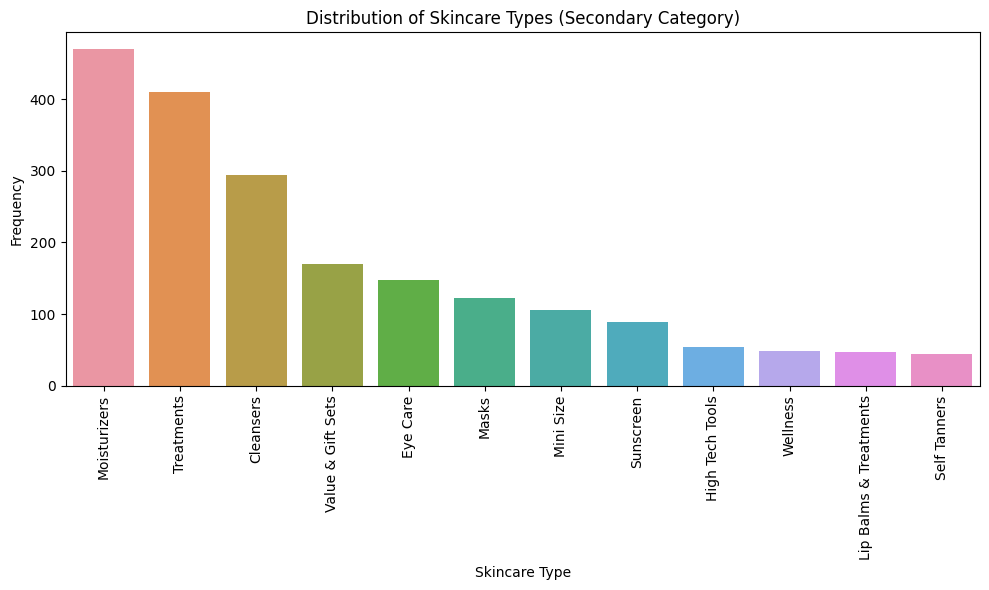

In [17]:
# Count the frequency of each secondary category
category_counts = skincare_df['secondary_category'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Skincare Type')
plt.ylabel('Frequency')
plt.title('Distribution of Skincare Types (Secondary Category)')
plt.tight_layout()
plt.show()

# Reviews Datasets

In [18]:
df_reviews_1 = pd.read_csv('reviews_0-250.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})
df_reviews_1.head()

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/3207280831.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1 = pd.read_csv('reviews_0-250.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [19]:
df_reviews_2 = pd.read_csv('reviews_1250-end.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})
df_reviews_2.head()

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/1271323959.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_2 = pd.read_csv('reviews_1250-end.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [20]:
df_reviews_3 = pd.read_csv('reviews_250-500.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})
df_reviews_3.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


In [21]:
df_reviews_4 = pd.read_csv('reviews_500-750.csv', dtype={'Sentences': str}).rename(columns={'Sentences': 'text'})
df_reviews_4.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,NaN,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,NaN,NaN,NaN,NaN,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0


In [22]:
df_reviews_5 = pd.read_csv('reviews_750-1250.csv', dtype={'Sentences': str}, low_memory=False).rename(columns={'Sentences': 'text'})
df_reviews_5.head()


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,8554483509,2,0.0,NaN,0,0,0,2023-03-21,This was gifted by Supergoop! in exchange for ...,Nice packaging but easy to overuse,light,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
1,1,24710523057,2,0.0,1.000000,2,0,2,2023-03-07,I didn’t like it; too much product comes out w...,Packaging is not suits le,NaN,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
2,2,8429283179,5,1.0,0.941176,34,2,32,2023-03-01,Y’all….I’m begging for everyone to read instru...,PLS READ THIS LOL,light,green,normal,brown,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
3,3,8105185455,1,0.0,0.000000,5,5,0,2023-02-27,I have not figured out how to use this product...,At a loss,tan,brown,combination,black,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
4,4,1515931062,1,0.0,0.000000,7,7,0,2023-02-27,I’m at a loss as to how to use this thing!!! C...,NOT for me!!,fair,blue,combination,blonde,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0


## Combining the Reviews Datasets

In [23]:
all_reviews_df = pd.concat([df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5], ignore_index=True)
all_reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [24]:
def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans("", "", string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text

all_reviews_df.loc[:, 'review_text'] = all_reviews_df['review_text'].apply(remove_punctuation)
all_reviews_df.loc[:, 'review_title'] = all_reviews_df['review_title'].apply(remove_punctuation)

In [25]:
all_reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all I get so excited t...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Cant go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,If you have dry cracked lips this is a must ha...,A must have,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [26]:
all_reviews_df1 = all_reviews_df.copy(deep=True)

# Loop through all columns in the copied DataFrame
for column in all_reviews_df1.columns:
    if all_reviews_df1[column].dtype == 'object':  # Check if the column contains string data
        all_reviews_df1.loc[:, column] = all_reviews_df1[column].str.lower()

In [27]:
all_reviews_df1.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,NaN,5,1.0,1.0,2,0,2,2023-02-01,i use this with the nudestix “citrus clean bal...,taught me how to double cleanse,NaN,brown,dry,black,p504322,gentle hydra-gel face cleanser,nudestix,19.0
1,1,NaN,1,0.0,NaN,0,0,0,2023-03-21,i bought this lip mask after reading the revie...,disappointed,NaN,NaN,NaN,NaN,p420652,lip sleeping mask intense hydration with vitam...,laneige,24.0
2,2,NaN,5,1.0,NaN,0,0,0,2023-03-21,my review title says it all i get so excited t...,new favorite routine,light,brown,dry,blonde,p420652,lip sleeping mask intense hydration with vitam...,laneige,24.0
3,3,NaN,5,1.0,NaN,0,0,0,2023-03-20,i’ve always loved this formula for a long time...,cant go wrong with any of them,NaN,brown,combination,black,p420652,lip sleeping mask intense hydration with vitam...,laneige,24.0
4,4,NaN,5,1.0,NaN,0,0,0,2023-03-20,if you have dry cracked lips this is a must ha...,a must have,light,hazel,combination,NaN,p420652,lip sleeping mask intense hydration with vitam...,laneige,24.0


In [28]:
del all_reviews_df1['author_id']
del all_reviews_df1['price_usd']
del all_reviews_df1['hair_color']
del all_reviews_df1['eye_color']
del all_reviews_df1['skin_tone']
del all_reviews_df1['helpfulness']

In [29]:
del all_reviews_df1['total_neg_feedback_count']
del all_reviews_df1['total_pos_feedback_count']
del all_reviews_df1['total_feedback_count']

In [30]:
del all_reviews_df1['Unnamed: 0']

In [31]:
all_reviews_df1.head()

,rating,is_recommended,submission_time,review_text,review_title,skin_type,product_id,product_name,brand_name
0,5,1.0,2023-02-01,i use this with the nudestix “citrus clean bal...,taught me how to double cleanse,dry,p504322,gentle hydra-gel face cleanser,nudestix
1,1,0.0,2023-03-21,i bought this lip mask after reading the revie...,disappointed,NaN,p420652,lip sleeping mask intense hydration with vitam...,laneige
2,5,1.0,2023-03-21,my review title says it all i get so excited t...,new favorite routine,dry,p420652,lip sleeping mask intense hydration with vitam...,laneige
3,5,1.0,2023-03-20,i’ve always loved this formula for a long time...,cant go wrong with any of them,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige
4,5,1.0,2023-03-20,if you have dry cracked lips this is a must ha...,a must have,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige


In [32]:
skincare_df1.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category
89,p439055,genius sleeping collagen moisturizer,algenist,4.5413,collagen vegan water aqua eau ethylhexyl palmi...,vegan good for loss of firmness collagen hypoa...,skincare,moisturizers
90,p421277,genius liquid collagen serum,algenist,4.0259,collagen vegan water aqua eau propanediol ison...,vegan good for loss of firmness collagen hypoa...,skincare,treatments
92,p432045,genius liquid collagen lip treatment,algenist,3.8721,collagen vegan water aqua eau glycerin isonony...,vegan good for loss of firmness plumping colla...,skincare,lip balms & treatments
93,p311143,sublime defense ultra lightweight uv defense f...,algenist,4.4134,octinoxate 75 titanium dioxide 2 zinc oxide 17...,vegan hypoallergenic uv protection spf best fo...,skincare,sunscreen
94,p384537,genius ultimate anti-aging cream,algenist,4.2525,water aqua eau capryliccapric triglyceride hyd...,vegan collagen hypoallergenic good for loss of...,skincare,moisturizers


In [33]:
print("Columns in all_reviews_df1:", all_reviews_df1.columns)
print("Columns in skincare_df1:", skincare_df1.columns)

Columns in all_reviews_df1: Index(['rating', 'is_recommended', 'submission_time', 'review_text',
       'review_title', 'skin_type', 'product_id', 'product_name',
       'brand_name'],
      dtype='object')
Columns in skincare_df1: Index(['product_id', 'product_name', 'brand_name', 'rating', 'ingredients',
       'highlights', 'primary_category', 'secondary_category'],
      dtype='object')


# Merging Product Info Dataset and Reviews Dataset

In [34]:
merged_df = pd.merge(all_reviews_df1, skincare_df1, on='product_id', how='inner')

merged_df.head()

,rating_x,is_recommended,submission_time,review_text,review_title,skin_type,product_id,product_name_x,brand_name_x,product_name_y,brand_name_y,rating_y,ingredients,highlights,primary_category,secondary_category
0,5,1.0,2023-02-01,i use this with the nudestix “citrus clean bal...,taught me how to double cleanse,dry,p504322,gentle hydra-gel face cleanser,nudestix,gentle hydra-gel face cleanser,nudestix,5.0000,water aqua dipropylene glycol peg6 capryliccap...,clean at sephora,skincare,cleansers
1,1,0.0,2023-03-21,i bought this lip mask after reading the revie...,disappointed,NaN,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
2,5,1.0,2023-03-21,my review title says it all i get so excited t...,new favorite routine,dry,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
3,5,1.0,2023-03-20,i’ve always loved this formula for a long time...,cant go wrong with any of them,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
4,5,1.0,2023-03-20,if you have dry cracked lips this is a must ha...,a must have,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments


In [35]:
#del merged_df['product_name_y']
#del merged_df['brand_name_y']
#del merged_df['loves_count']
#del merged_df['primary_category']
#del merged_df['reviews']
#del merged_df['brand_id']
#del merged_df['rating_y']
merged_df.head()

,rating_x,is_recommended,submission_time,review_text,review_title,skin_type,product_id,product_name_x,brand_name_x,product_name_y,brand_name_y,rating_y,ingredients,highlights,primary_category,secondary_category
0,5,1.0,2023-02-01,i use this with the nudestix “citrus clean bal...,taught me how to double cleanse,dry,p504322,gentle hydra-gel face cleanser,nudestix,gentle hydra-gel face cleanser,nudestix,5.0000,water aqua dipropylene glycol peg6 capryliccap...,clean at sephora,skincare,cleansers
1,1,0.0,2023-03-21,i bought this lip mask after reading the revie...,disappointed,NaN,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
2,5,1.0,2023-03-21,my review title says it all i get so excited t...,new favorite routine,dry,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
3,5,1.0,2023-03-20,i’ve always loved this formula for a long time...,cant go wrong with any of them,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments
4,5,1.0,2023-03-20,if you have dry cracked lips this is a must ha...,a must have,combination,p420652,lip sleeping mask intense hydration with vitam...,laneige,lip sleeping mask intense hydration with vitam...,laneige,4.3508,diisostearyl malate hydrogenated polyisobutene...,allure 2019 best of beauty award winner commun...,skincare,lip balms & treatments


# Product Recommendation

In [36]:
popularity_scores = merged_df.groupby('product_id')['rating_x'].mean()
popularity_scores = popularity_scores.reset_index()
popularity_scores.columns = ['product_id', 'popularity_score']

merged_df = pd.merge(merged_df, popularity_scores, on='product_id', how='left')

user_skin_type = 'dry' 

filtered_products = merged_df[merged_df['skin_type'] == user_skin_type]

sorted_products = filtered_products.sort_values(by='popularity_score', ascending=False)

N = 5 

top_n_recommendations = sorted_products.head(N)
print(top_n_recommendations)

        rating_x  is_recommended submission_time  \
0              5             1.0      2023-02-01   
588953         5             1.0      2023-03-12   
590071         5             1.0      2023-01-19   
589936         5             1.0      2023-03-10   
589917         5             1.0      2022-04-05   

                                              review_text  \
0       i use this with the nudestix “citrus clean bal...   
588953  my skin feel smoother less texture visibly plu...   
590071  this is my second bottle and was excited to se...   
589936  i am absolutely obsessed over this new led eye...   
589917  i didn’t want to like this but i really do it’...   

                           review_title skin_type product_id  \
0       taught me how to double cleanse       dry    p504322   
588953                         the best       dry    p504049   
590071            my favorite eye cream       dry    p504594   
589936              best red light mask       dry    p503906   


In [37]:
import pandas as pd


# Filter out products with insufficient ratings
filtered_products = merged_df.groupby('product_id').filter(lambda x: len(x) >= 4)

# Calculate average ratings for each product within each skin type
average_ratings_by_skin_type = filtered_products.groupby(['skin_type', 'product_id'])['rating_x'].mean().reset_index()

# Sort products within each skin type by average ratings
sorted_products_by_skin_type = average_ratings_by_skin_type.groupby('skin_type').apply(lambda x: x.sort_values(by='rating_x', ascending=False))

# Reset the index to remove the ambiguity
sorted_products_by_skin_type = sorted_products_by_skin_type.reset_index(drop=True)

# Select top-N highest rated products for each skin type
N = 5  # Number of recommendations
top_n_recommendations = sorted_products_by_skin_type.groupby('skin_type').head(N)

# Print the top-N recommended products for each skin type
print("Top-N Recommended Products for Different Skin Types:")
print(top_n_recommendations)


Top-N Recommended Products for Different Skin Types:
        skin_type product_id  rating_x
0     combination    p500124       5.0
1     combination    p477812       5.0
2     combination    p483058       5.0
3     combination    p471011       5.0
4     combination    p504049       5.0
1858          dry    p481834       5.0
1859          dry    p457011       5.0
1860          dry    p457002       5.0
1861          dry    p456997       5.0
1862          dry    p475183       5.0
3686       normal    p480358       5.0
3687       normal    p477150       5.0
3688       normal    p481712       5.0
3689       normal    p481668       5.0
3690       normal    p481145       5.0
5476         oily    p481058       5.0
5477         oily    p502740       5.0
5478         oily    p502365       5.0
5479         oily    p472341       5.0
5480         oily    p472342       5.0


In [38]:
filtered_products = merged_df.groupby('product_id').filter(lambda x: len(x) >= 4)

average_ratings_by_skin_type = filtered_products.groupby(['skin_type', 'product_id'])['rating_x'].mean().reset_index()

sorted_products_by_skin_type = average_ratings_by_skin_type.groupby('skin_type').apply(lambda x: x.sort_values(by='rating_x', ascending=False))

sorted_products_by_skin_type = sorted_products_by_skin_type.reset_index(drop=True)

N = 5  
top_n_recommendations = sorted_products_by_skin_type.groupby('skin_type').head(N)

print("Top Recommended Products for Different Skin Types:")
for skin_type, recommendations in top_n_recommendations.groupby('skin_type'):
    print(f"Skin Type: {skin_type}")
    for _, row in recommendations.iterrows():
        product_id = row['product_id']
        product_name = merged_df[merged_df['product_id'] == product_id]['product_name_x'].iloc[0]
        secondary_category = merged_df[merged_df['product_id'] == product_id]['secondary_category'].iloc[0]
        average_rating = row['rating_x']
        print(f"Product: {product_name} (Secondary Category: {secondary_category}), Average Rating: {average_rating}")
    print()


Top Recommended Products for Different Skin Types:
Skin Type: combination
Product: eradikate try-me-kit (Secondary Category: value & gift sets), Average Rating: 5.0
Product: refillable jumbo magic cream moisturizer with hyaluronic acid (Secondary Category: moisturizers), Average Rating: 5.0
Product: goopglow flower acids resurfacing toner (Secondary Category: cleansers), Average Rating: 5.0
Product: take the day off cleansing balm makeup remover duo (Secondary Category: value & gift sets), Average Rating: 5.0
Product: skin filter daily brightening phyto-retinol + aha serum (Secondary Category: treatments), Average Rating: 5.0

Skin Type: dry
Product: concentrated ginseng renewing cream classic (Secondary Category: moisturizers), Average Rating: 5.0
Product: cryo rubber mask with firming collagen (Secondary Category: masks), Average Rating: 5.0
Product: superbeauty daily antioxidant skinsupplement (Secondary Category: wellness), Average Rating: 5.0
Product: night serum (Secondary Catego

# Visualisation for Recommender

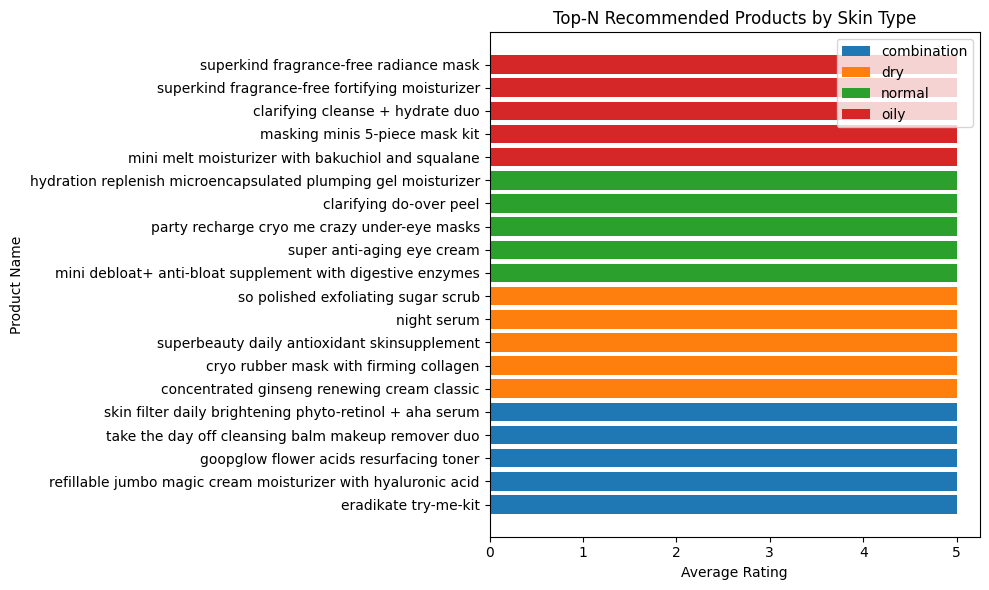

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for skin_type, recommendations in top_n_recommendations.groupby('skin_type'):
    product_names = []
    average_ratings = []
    for _, row in recommendations.iterrows():
        product_id = row['product_id']
        product_name = merged_df[merged_df['product_id'] == product_id]['product_name_x'].iloc[0]
        average_rating = row['rating_x']
        product_names.append(product_name)
        average_ratings.append(average_rating)
    
    plt.barh(product_names, average_ratings, label=skin_type)

plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Top-N Recommended Products by Skin Type')
plt.legend()
plt.tight_layout()
plt.show()


# Ingredient Analysis

**Extracting skin concerns identified in the Look Fantastic Skincare 2021 report (can be seen further down the script) from the highlights column**

In [40]:
# Define keywords
keywords = ["rosacea", "blackheads", "hyperpigmentation", "acne scars", "spots", "redness", "undereye", "hormonal", "dry", "wrinkles", "pigmentation"]
#these keywords are the top skin concerns based on average web searches, as identified in the 2021 Look Fantastic Skinfluencer Report - more on this further down the script. 

# Function to extract keywords
def extract_keywords(text):
    if isinstance(text, str):  
        extracted_keywords = []
        for keyword in keywords:
            if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE):
                extracted_keywords.append(keyword)
        return ", ".join(extracted_keywords)
    else:
        return ""  # An empty string to be returned for non-string values

# Applying the function to create the "skin concern" column in the skincare_df1
skincare_df1["skin_concern"] = skincare_df1["highlights"].apply(extract_keywords)

In [41]:
skincare_df1.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category,skin_concern
89,p439055,genius sleeping collagen moisturizer,algenist,4.5413,collagen vegan water aqua eau ethylhexyl palmi...,vegan good for loss of firmness collagen hypoa...,skincare,moisturizers,dry
90,p421277,genius liquid collagen serum,algenist,4.0259,collagen vegan water aqua eau propanediol ison...,vegan good for loss of firmness collagen hypoa...,skincare,treatments,dry
92,p432045,genius liquid collagen lip treatment,algenist,3.8721,collagen vegan water aqua eau glycerin isonony...,vegan good for loss of firmness plumping colla...,skincare,lip balms & treatments,dry
93,p311143,sublime defense ultra lightweight uv defense f...,algenist,4.4134,octinoxate 75 titanium dioxide 2 zinc oxide 17...,vegan hypoallergenic uv protection spf best fo...,skincare,sunscreen,dry
94,p384537,genius ultimate anti-aging cream,algenist,4.2525,water aqua eau capryliccapric triglyceride hyd...,vegan collagen hypoallergenic good for loss of...,skincare,moisturizers,dry


**Extracting main ingredient from the ingredients column**

In [42]:
# Extract the first word from the 'ingredients' column, handling non-string values. I am extracting the first word in the ingredients column and considering this to be the main ingredient in the product as ingredients are usually listed in order of quantity, starting with the largest quantity. 
def extract_first_word(text):
    if isinstance(text, str):
        return text.split()[0]
    else:
        return str(text)

skincare_df1['main_ingredient'] = skincare_df1['ingredients'].apply(extract_first_word)

# Display the updated DataFrame
skincare_df1.head()

,product_id,product_name,brand_name,rating,ingredients,highlights,primary_category,secondary_category,skin_concern,main_ingredient
89,p439055,genius sleeping collagen moisturizer,algenist,4.5413,collagen vegan water aqua eau ethylhexyl palmi...,vegan good for loss of firmness collagen hypoa...,skincare,moisturizers,dry,collagen
90,p421277,genius liquid collagen serum,algenist,4.0259,collagen vegan water aqua eau propanediol ison...,vegan good for loss of firmness collagen hypoa...,skincare,treatments,dry,collagen
92,p432045,genius liquid collagen lip treatment,algenist,3.8721,collagen vegan water aqua eau glycerin isonony...,vegan good for loss of firmness plumping colla...,skincare,lip balms & treatments,dry,collagen
93,p311143,sublime defense ultra lightweight uv defense f...,algenist,4.4134,octinoxate 75 titanium dioxide 2 zinc oxide 17...,vegan hypoallergenic uv protection spf best fo...,skincare,sunscreen,dry,octinoxate
94,p384537,genius ultimate anti-aging cream,algenist,4.2525,water aqua eau capryliccapric triglyceride hyd...,vegan collagen hypoallergenic good for loss of...,skincare,moisturizers,dry,water


**Show the highest rated products per skin concern and their main ingredient**

In [43]:
# List of target skin concerns - these concerns are the same as the top skin concerns based on average web searches as reported in the 2021 Look Fantastic Skinfluencer Report. More on this further down the script. 
target_skin_concerns = ["rosacea", "blackheads", "hyperpigmentation", "acne scars", "spots", "redness", "undereye", "hormonal", "dry", "wrinkles", "pigmentation"]  

# Iterating through the target skin concerns
for skin_concern in target_skin_concerns:
    # Filtering the DataFrame for the current skin concern
    filtered_df = skincare_df1[skincare_df1['skin_concern'] == skin_concern]
    
    if not filtered_df.empty:
        # Finding the product with the highest rating for the current skin concern
        highest_rated_product = filtered_df.loc[filtered_df['rating'].idxmax()]
        
        # Printing the result
        print(f"For skin concern '{skin_concern}', the highest rated product is '{highest_rated_product['product_name']}' with a rating of {highest_rated_product['rating']}")
        print(f"Main ingredient: {highest_rated_product['main_ingredient']}")
    else:
        print(f"No products found for skin concern '{skin_concern}'.")

No products found for skin concern 'rosacea'.
No products found for skin concern 'blackheads'.
No products found for skin concern 'hyperpigmentation'.
No products found for skin concern 'acne scars'.
For skin concern 'spots', the highest rated product is 'vinoperfect  brightening solution set' with a rating of 5.0
Main ingredient: vinoperfect
For skin concern 'redness', the highest rated product is 'youth reformer firming vitamin c oil serum' with a rating of 4.9623
Main ingredient: squalane
No products found for skin concern 'undereye'.
No products found for skin concern 'hormonal'.
For skin concern 'dry', the highest rated product is 'self tanning face & body tinted gel' with a rating of 5.0
Main ingredient: aquawatereau
No products found for skin concern 'wrinkles'.
No products found for skin concern 'pigmentation'.


It semms that within the Sephora product database, from the highlights column, there are no products which mention some of the top 10 skincare concerns from the 2021 Look Fantastic Skinfluencer Report, such as Rosacea and Blackheads. This shows that there may be a gap in the market for products (within Sephora) which address these concerns.

**Show the top 10 main ingredients**

In [44]:

column_name = 'main_ingredient'

# Checking the data type of the main_ingredient column
column_data_type = skincare_df1[column_name].dtypes
print(f"The data type of column '{column_name}' is: {column_data_type}")

The data type of column 'main_ingredient' is: object


In [45]:

column_name = 'main_ingredient'

# Changing the column to string data type
skincare_df1[column_name] = skincare_df1[column_name].astype(str)

#dropping nan values
skincare_df1[column_name] = skincare_df1[column_name].dropna()


In [46]:
from collections import Counter

# Counting the frequency of main ingredients
ingredient_counter = Counter(skincare_df1['main_ingredient'])

# Retrieving the top 10 most frequent main ingredients
top_ingredients = ingredient_counter.most_common(10)

# Print the results
print("Top 10 most frequent main ingredients:")
for ingredient, count in top_ingredients:
    print(f"Ingredient: {ingredient}, Count: {count}")

Top 10 most frequent main ingredients:
Ingredient: water, Count: 432
Ingredient: wateraquaeau, Count: 320
Ingredient: aqua, Count: 211
Ingredient: aquawatereau, Count: 202
Ingredient: nan, Count: 76
Ingredient: avobenzone, Count: 44
Ingredient: aloe, Count: 27
Ingredient: salicylic, Count: 26
Ingredient: aquawater, Count: 26
Ingredient: glycerin, Count: 20


The top 10 main ingredients used in products in the Sephora Database mostly seem to be some form of water. However, we can see that Salicylic Acid features in the top 10 ingredients in the Sephora databse. This ingredient also features in the top 10 most searched for ingredient according to the Look Fantastic 2022 Report(featured further down in this script).

# Creating a second dataframe to analyse the top highlights and ingredients and to recommend the top rated products for each top highlight

**Preprocessing the data**

In [47]:
df_2 = pd.read_csv('product_info.csv')

df_2.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


**Deleting irrelevant columns**

In [48]:
#commenting this out as the code will return an error if ran, as columns cannot be deleted twice
#del df_2['brand_id']
#del df_2['loves_count']
#del df_2['size']
#del df_2['variation_type']
#del df_2['variation_value']
#del df_2['online_only']
#del df_2['out_of_stock']
#del df_2['sephora_exclusive']
#del df_2['child_count']
#del df_2['child_max_price']
#del df_2['child_min_price']

In [49]:
df_2.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [50]:
#commenting out these columns as the code will return an error if ran, as columns cannot be deleted twice
#del df_2['variation_desc']
#del df_2['value_price_usd']
#del df_2['sale_price_usd']
#del df_2['limited_edition']
#del df_2['new']

In [51]:
df_2.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


**Removing stopwords**

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferhutchinson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
#cleaning 
stop_words = set(stopwords.words('english'))
df_2.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


**Removing unescessary characters from the highlights and ingredients columns**

In [54]:
# Removing specified characters in the highlights column while preserving commas
df_2['highlights'] = df_2['highlights'].str.replace(r"['\[\]/]", '').str.replace(',', ', ')

df_2.head()

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/714775244.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['highlights'] = df_2['highlights'].str.replace(r"['\[\]/]", '').str.replace(',', ', ')


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"Unisex Genderless Scent, Warm &Spicy Scent, ...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"Unisex Genderless Scent, Layerable Scent, Wa...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"Unisex Genderless Scent, Layerable Scent, Wo...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"Unisex Genderless Scent, Layerable Scent, Wa...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"Unisex Genderless Scent, Layerable Scent, Wo...",Fragrance,Women,Perfume,2,75.0,30.0


In [55]:
# Removing specified characters in the ingredients column while preserving commas
df_2['hightlights'] = df_2['highlights'].str.replace(r"['\[\]()]", '').str.replace(',', ', ')

df_2.head()

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/3543844673.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['hightlights'] = df_2['highlights'].str.replace(r"['\[\]()]", '').str.replace(',', ', ')


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,hightlights
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,0,0,"Unisex Genderless Scent, Warm &Spicy Scent, ...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN,"Unisex Genderless Scent, Warm &Spicy Scent, ..."
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"Unisex Genderless Scent, Layerable Scent, Wa...",Fragrance,Women,Perfume,2,85.0,30.0,"Unisex Genderless Scent, Layerable Scent, ..."
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"Unisex Genderless Scent, Layerable Scent, Wo...",Fragrance,Women,Perfume,2,75.0,30.0,"Unisex Genderless Scent, Layerable Scent, ..."
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"Unisex Genderless Scent, Layerable Scent, Wa...",Fragrance,Women,Perfume,2,75.0,30.0,"Unisex Genderless Scent, Layerable Scent, ..."
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,"Unisex Genderless Scent, Layerable Scent, Wo...",Fragrance,Women,Perfume,2,75.0,30.0,"Unisex Genderless Scent, Layerable Scent, ..."


**Filtering on skincare**

In [56]:
skincare_df2 = df_2[df_2['primary_category'].str.lower() == 'skincare']

skincare_df2.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,hightlights
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,1,"Vegan, Good for: Loss of firmness, Collagen,...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN,"Vegan, Good for: Loss of firmness, Collage..."
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,1,"Vegan, Good for: Loss of firmness, Collagen,...",Skincare,Treatments,Face Serums,1,25.0,25.0,"Vegan, Good for: Loss of firmness, Collage..."
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,NaN,NaN,NaN,...,0,1,NaN,Skincare,Eye Care,Eye Creams & Treatments,0,NaN,NaN,NaN
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,.5 oz / 15 mL,Size,.5 oz / 15 mL,...,0,1,"Vegan, Good for: Loss of firmness, Plumping,...",Skincare,Lip Balms & Treatments,NaN,0,NaN,NaN,"Vegan, Good for: Loss of firmness, Plumpin..."
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,27278,4.4134,508.0,1 oz,Size,1 oz,...,0,0,"Vegan, Hypoallergenic, UV Protection, SPF, ...",Skincare,Sunscreen,Face Sunscreen,0,NaN,NaN,"Vegan, Hypoallergenic, UV Protection, SP..."


**Top (most frequent) Ingredients and Top Highlights**

In [57]:
# Counting the frequency of each ingredient
ingredient_count = skincare_df2['ingredients'].str.split(', ').explode().value_counts()

In [58]:
# Selecting the top 10 (most frequent) ingredients
top_ingredients = ingredient_count[:10]

print(top_ingredients)

Glycerin              1944
Phenoxyethanol        1220
Butylene Glycol       1158
Tocopherol             952
Citric Acid            937
Propanediol            923
Sodium Hyaluronate     897
Ethylhexylglycerin     888
Xanthan Gum            848
Caprylyl Glycol        847
Name: ingredients, dtype: int64


**None of the most frequently appearing ingredients above feature in the 2022 Look Fantastic Skinfluencer most searched for ingredients list**

In [59]:
# Counting the frequency of each highlights
highlight_count = skincare_df2['highlights'].str.split(', ').explode().value_counts()

In [60]:
# Selecting the top 10(most frequent) highlights
top_highlights = highlight_count[:10]

print(top_highlights)

 Combo                               664
 Normal Skin                         664
 Clean at Sephora                    625
 Good for: Dryness                   580
 Cruelty-Free                        574
Vegan                                545
 Good for: Anti-Aging                510
 Without Parabens                    413
 Good for: DullnessUneven Texture    408
 Hydrating                           393
Name: highlights, dtype: int64


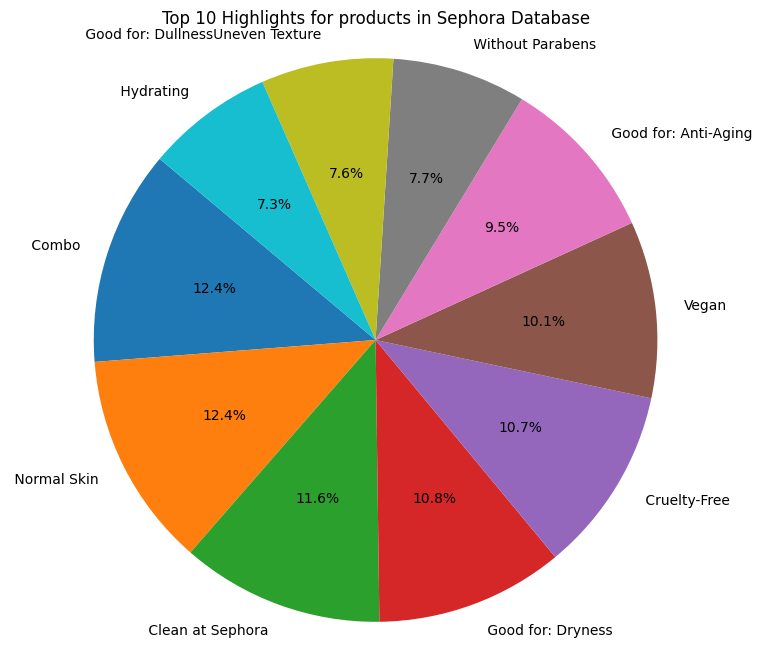

In [61]:
#putting the most frequent highlights into a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_highlights.values, labels=top_highlights.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Highlights for products in Sephora Database')
plt.axis('equal')  
plt.show()

Some of the most frequently seen highlights from the Sephora database can also be seen in the 2021 Look Fantatsic Skinfluencer Report. Good for: Dryness and Good for: Anti-Aging in the Sephora Product Database relate to Dryness and Wrinkles in the Look Fantastic 2021 Skinfluencer Report. However the majority of the most frequent highlights from the Sephora Products Database do not feature in the Look Fantastic Skinfluencer Report as the most searched for skin concerns. 

**Finding the top rated product and its ingredients (first 5) for each top (most frequent) highlight**

In [62]:
# Finding the top 10 most common highlights
top_highlight_counts = skincare_df2['highlights'].str.split(', ').explode().value_counts()
top_common_highlights = top_highlight_counts.head(10).index.tolist()

for highlight in top_common_highlights:
    print(f"Top product for '{highlight}':")
    
    # Filtering and processing the DataFrame
    filtered_df = skincare_df2.dropna(subset=['highlights'])
    filtered_df = filtered_df[filtered_df['highlights'].apply(lambda highlights: highlight in highlights)]

    if not filtered_df.empty:
        # Sorting the filtered DataFrame by rating in descending order
        sorted_filtered_df = filtered_df.sort_values(by='rating', ascending=False)

        # Selecting the top row from the sorted filtered DataFrame
        top_product_row = sorted_filtered_df.iloc[0]

        top_product_name = top_product_row['product_name']
        top_product_rating = top_product_row['rating']
        top_product_ingredients = top_product_row['ingredients'].split(', ')[:5]  # Selecting the first five ingredients

        print(f" - Product: '{top_product_name}'")
        print(f"   Rating: {top_product_rating}")
        print(f"   Ingredients: {', '.join(top_product_ingredients)}")  # Joining the ingredients back into a string
    else:
        print(f" - No products found with the highlight '{highlight}'")
    print()  

Top product for ' Combo':
 - Product: 'Multi Action Clear Gentle Daily Brightening & Retexturizing Toner for Acne and Breakouts'
   Rating: 5.0
   Ingredients: ['Water/Aqua/Eau, Propanediol, Alcohol Denat., Caprylyl/Capryl Glucoside, Acetyl Glucosamine

Top product for ' Normal Skin':
 - Product: 'ExfoliKate All Over Glow Kit'
   Rating: 5.0
   Ingredients: ['ExfoliKate Intensive Exfoliating Treatment:', 'Aqua/Water/Eau, Lactic Acid, Silica, Glycine Soja (Soybean) Oil

Top product for ' Clean at Sephora':
 - Product: 'Cleansing & Hydrating Bestseller Set Bento Box'
   Rating: 5.0
   Ingredients: ['Nomad’s Cream Purifying Cleanser:', 'Water/Aqua, Dicaprylyl Ether, Caprylic/Capric Triglyceride,', 'Propanediol

Top product for ' Good for: Dryness':
 - Product: 'Essential Comfort Moisture Cream'
   Rating: 5.0
   Ingredients: ['Water / Aqua / Eau, Butylene Glycol, Cyclopentasiloxane, Dimethicone, Glycerin

Top product for ' Cruelty-Free':
 - Product: 'Barrier Culture Moisturizer with Niaci

# SQL Database - Look Fantastic Skinfluencer Report

Links to the Look Fantastic Reports can be found below online: 
    
https://www.lookfantastic.com/blog/discover/2022-beauty-trends/
https://www.lookfantastic.com/blog/trends/the-2021-skinfluencer-report/

**Connecting to the DB**

In [63]:
import sqlite3

In [64]:

connection = sqlite3.connect('skincare_trends.db')  

In [65]:
cursor = connection.cursor()

**Creating tables in the DB**

In [66]:
#cursor.execute('''
#    CREATE TABLE skincare_concern (
#    skin_concern VARCHAR(30) NOT NULL,
#    avg_search_colume INT NOT NULL
#    );
#''')
#commenting out as table has already been created. 

In [67]:
#cursor.execute('''
#   CREATE TABLE popular_ingredients (
#    ingredients VARCHAR(30) NOT NULL,
#    avg_ingredients_search_volume INT NOT NULL
#    );   
    

#''')
#commenting out as table has already been created

**Inserting values into the tables**

In [68]:
#cursor.execute('''
#    INSERT INTO skincare_concern(skin_concern, avg_search_colume)
# VALUES 
# ("Rosacea", 90500),
# ("Blackheads", 60500),
# ("Hyperpigmentation", 33100),
# ("Acne Scars", 18100),
# ("Skin Redness Spots", 14800), 
# ("Undereye Bags", 12100),
# ("Hormonal Acne", 9900),
# ("Dry Skin", 9900),
# ("Wrinkles", 8100),
# ("Skin Pigmentation", 6600); 
    

#''')
#commenting out as values have already been inserted

In [69]:
connection.commit()

In [70]:
cursor.execute('SELECT * FROM skincare_concern')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Rosacea', 90500)
('Blackheads', 60500)
('Hyperpigmentation', 33100)
('Acne Scars', 18100)
('Skin Redness Spots', 14800)
('Undereye Bags', 12100)
('Hormonal Acne', 9900)
('Dry Skin', 9900)
('Wrinkles', 8100)
('Skin Pigmentation', 6600)


In [71]:
#cursor.execute('''
#   INSERT INTO popular_ingredients(ingredients, avg_ingredients_search_volume)
#VALUES 
#("Salicylic Acid", 60500),
#("Collagen", 60500),
#("Retinol", 49500),
#("Hyaluronic Acid", 49500),
#("Vitamin C", 49500), 
#("Niacinamide", 33100),
#("Azlaic Acid", 27100),
#("Witch Hazel", 22200),
#("Glycolic Acid", 22200),
#("Rosehip Oil", 6600); 
    

#''')
#commenting out this section as the values cannot be inserted into the database twice. 

In [72]:
connection.commit()

In [73]:
cursor.execute('SELECT * FROM popular_ingredients')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Salicylic Acid', 60500)
('Collagen', 60500)
('Retinol', 49500)
('Hyaluronic Acid', 49500)
('Vitamin C', 49500)
('Niacinamide', 33100)
('Azlaic Acid', 27100)
('Witch Hazel', 22200)
('Glycolic Acid', 22200)
('Rosehip Oil', 6600)


**Pie Chart to show the proportion of the top Skin Concerns from the 2021 Look Fantastic Skinfluencer Report**

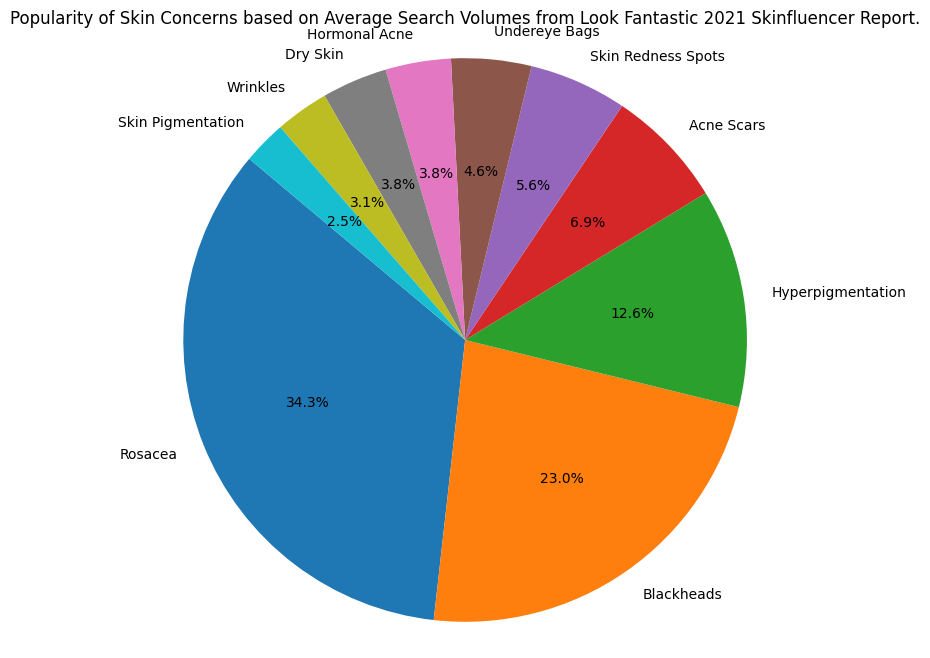

In [74]:

# Connecting to the database to the database
connection = sqlite3.connect('skincare_trends.db') 


query = 'SELECT * FROM skincare_concern' 
data = pd.read_sql(query, connection)

#closing the sql connection. 
connection.close()

labels = data['skin_concern'].tolist()
values = data['avg_search_colume'].tolist()


plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Popularity of Skin Concerns based on Average Search Volumes from Look Fantastic 2021 Skinfluencer Report.')
plt.show()


Rosacea is by far the most searched for skincare concern according to the Look Fantastic Skinfluencer Report 2021, followed by Blackheads and Hyperpigmentation. However, none of these terms returned any search results from the highlights in the Sephora product database. This could suggest that there is a gap in market for more products which tackle skin concerns such as Rosacea, Blackheads and Hyperpigmentation.

**Pie Chart to show the most search for ingredients**

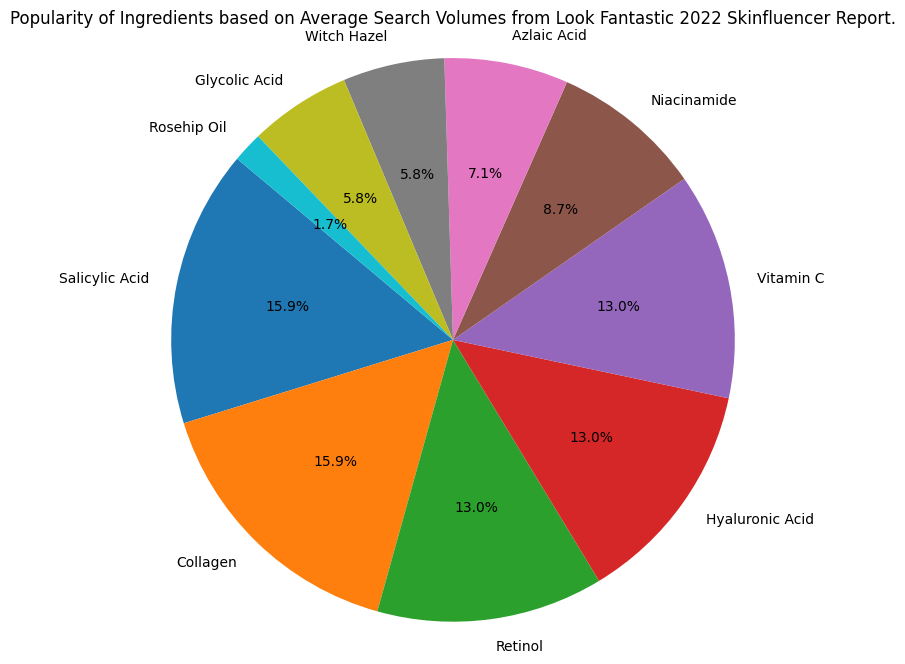

In [75]:
# Connecting to the database to the database
connection = sqlite3.connect('skincare_trends.db') 

query = 'SELECT * FROM popular_ingredients' 
data = pd.read_sql(query, connection)

connection.close()

labels = data['ingredients'].tolist()
values = data['avg_ingredients_search_volume'].tolist()


plt.ion
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Popularity of Ingredients based on Average Search Volumes from Look Fantastic 2022 Skinfluencer Report.')
plt.show()

plt.show()

# Machine Learning System - Predicating Product Rating's based on ingredients.¶

**Converting list of ingredients into a numerical representation uisng Bag of Words and TF-IDF. I have compared the Mean Squared Error from both approaches to check which approach would be better to use in a Machine Learning model.**

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Rows which have no ingredients listed are dropped. 
skincare_df2.dropna(subset=['ingredients'], inplace=True)

# Bag of Words approach is used to convert the ingredients strings into numerical representatives. 
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(skincare_df2['ingredients'])
print("Bag of Words matrix:")
print(bow_matrix.toarray())
print("Vocabulary:")
print(bow_vectorizer.get_feature_names_out())

Bag of Words matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary:
['00' '002' '005' ... 'ziziphus' 'zizyphus' 'zymomonas']


/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/2381968266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skincare_df2.dropna(subset=['ingredients'], inplace=True)


In [77]:
import numpy as np

dense_matrix = bow_matrix.toarray()
print(dense_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
ratings = skincare_df2['rating']  

**Cleaning the rating column to ensure there are non Nan values.** 

In [79]:
skincare_df2.dropna(subset=['rating'], inplace=True)

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/1875559365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skincare_df2.dropna(subset=['rating'], inplace=True)


In [80]:
mean_rating = skincare_df2['rating'].mean()
skincare_df2['rating'].fillna(mean_rating, inplace=True)

/var/folders/53/pgcy127x3xb0zqwpc6w872hc0000gn/T/ipykernel_2324/1199463813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skincare_df2['rating'].fillna(mean_rating, inplace=True)


In [81]:
data_type = skincare_df2['rating'].dtype
print("Data Type of 'ratings' column:", data_type)


Data Type of 'ratings' column: float64


In [82]:
missing_values = skincare_df['rating'].isnull().sum()
print("Number of missing values in 'ratings' column:", missing_values)

Number of missing values in 'ratings' column: 66


In [83]:
df_cleaned = skincare_df2.dropna(subset=['rating'])

**My cleaned Dataframe is called df_cleaned. The Bag of Words Matrix can now be evaluated.**

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ingredient_strings = df_cleaned['ingredients'].tolist()

# Instantiating the CountVectorizer
vectorizer = CountVectorizer()

# Transforming the ingredients into a numerical matrix
X = vectorizer.fit_transform(ingredient_strings)


y = df_cleaned['rating']

# The data is split into training and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The Linear Regression model is then trained. 
model = LinearRegression()
model.fit(X_train, y_train)

# The model is evaluated by producing a Mean Squared Error. 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.971899421911508


**The Mean Squared Error using the Bag of Words approach is high.**

**The TF-IDF approach is tried instead.** 

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ingredient_strings = df_cleaned['ingredients'].tolist()
ratings = df_cleaned['rating']

# Instantiating the CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transforming ingredients into TF-IDF vectors
X_tfidf = tfidf_vectorizer.fit_transform(ingredient_strings)


# The data is split into training and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, ratings, test_size=0.2, random_state=42)

# The Linear Regression model is then trained.
model = LinearRegression()
model.fit(X_train, y_train)


# The model is evaluated by producing a Mean Squared Error. 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# The trained TF-IDF vectorizer is saved and named 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

Mean Squared Error: 0.585662813991545


['tfidf_vectorizer.pkl']

**The TF-IDF approach works better compared to the Bag of Words approach as the Mean Squared Error is lower.**

**The TF-IDF model can be loaded and tested using a user input simulation on Jupyter notebook.**

In [86]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the trained model
loaded_model = joblib.load('model.pkl')

# Loading the TF-IDF vectorizer and vocabulary
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
vocabulary = tfidf_vectorizer.vocabulary_

# User input is simulated. 
user_input = input("Please enter an ingredient to get the predicted rating of products containing this ingredient:")

# The user input is preprocessed using the TF-IDF vectorizer
preprocessed_input = tfidf_vectorizer.transform([user_input])

# The model makes a prediction of a products rating based on the user input
predicted_rating = loaded_model.predict(preprocessed_input)[0]

# The predicted rating is printed. 
print("Predicted Rating:", predicted_rating)

Please enter an ingredient to get the predicted rating of products containing this ingredient:retinol
Predicted Rating: 3.0252618553425883


In [87]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the trained model
loaded_model = joblib.load('model.pkl')

# Loading the TF-IDF vectorizer and vocabulary
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
vocabulary = tfidf_vectorizer.vocabulary_

# User input is simulated. 
user_input = input("Please enter an ingredient to get the predicted rating of products containing this ingredient:")

# The user input is preprocessed using the TF-IDF vectorizer
preprocessed_input = tfidf_vectorizer.transform([user_input])

# The model makes a prediction of a products rating based on the user input
predicted_rating = loaded_model.predict(preprocessed_input)[0]

# The predicted rating is printed. 
print("Predicted Rating:", predicted_rating)

Please enter an ingredient to get the predicted rating of products containing this ingredient:collagen
Predicted Rating: 4.335990006743225


In [88]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the trained model
loaded_model = joblib.load('model.pkl')

# Loading the TF-IDF vectorizer and vocabulary
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
vocabulary = tfidf_vectorizer.vocabulary_

# User input is simulated. 
user_input = input("Please enter an ingredient to get the predicted rating of products containing this ingredient:")

# The user input is preprocessed using the TF-IDF vectorizer
preprocessed_input = tfidf_vectorizer.transform([user_input])

# The model makes a prediction of a products rating based on the user input
predicted_rating = loaded_model.predict(preprocessed_input)[0]

# The predicted rating is printed. 
print("Predicted Rating:", predicted_rating)

Please enter an ingredient to get the predicted rating of products containing this ingredient:vitamin c
Predicted Rating: 3.178727481870916


# Data Visualisations from Sephora Database

### Top 10 ingredient distribution

This ingredient distribution graph isolates the 10 most common ingredients used in skincare products. This can be useful to consumers, skincare enthusiasts, or manufacturers in understanding the most popular ingredients used in skincare products.


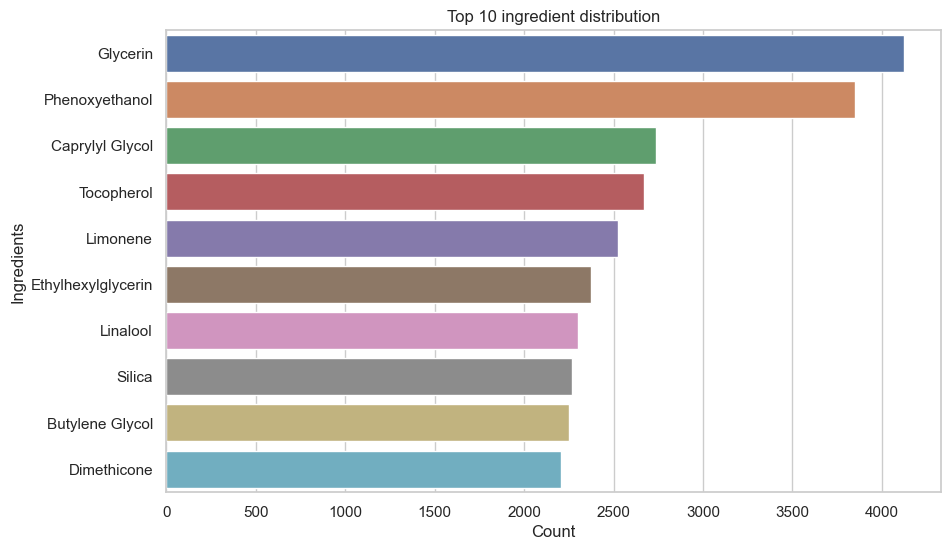

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
path = 'product_info.csv'
sephora_data = pd.read_csv(path)

# Counting the frequency of each ingredient
ingredient_count = sephora_data['ingredients'].str.split(', ').explode().value_counts()

# Selecting the top 10 ingredients
top_ingredients = ingredient_count[:10]

# Setting the style for Seaborn plots
sns.set(style='whitegrid')

# Creating distribution visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.title('Top 10 ingredient distribution')
plt.show()

### Distribution of product rating

The histogram highlights how the dataset's product ratings are distributed. We can derive the customer satisfaction and the quality of the products from this histogram visualisation.

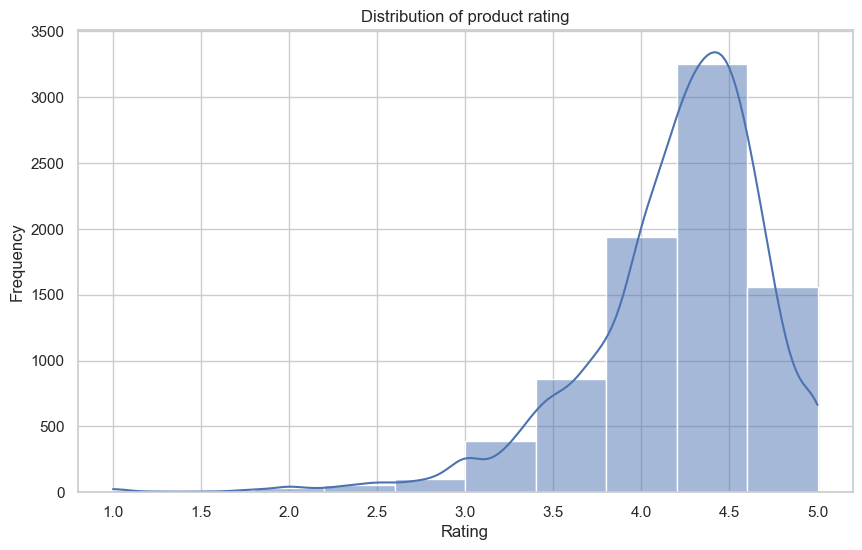

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
path = 'product_info.csv'
data = pd.read_csv(path)

# Setting the style for Seaborn plots
sns.set(style='whitegrid')

# Creating a histogram for rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rating', bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of product rating')
plt.show()

### Relationship between love count and rating

This scatter plot helps to undesrtand if products with higher love counts tend to have higher ratings and there seems to be a correlation between love counts and ratings.

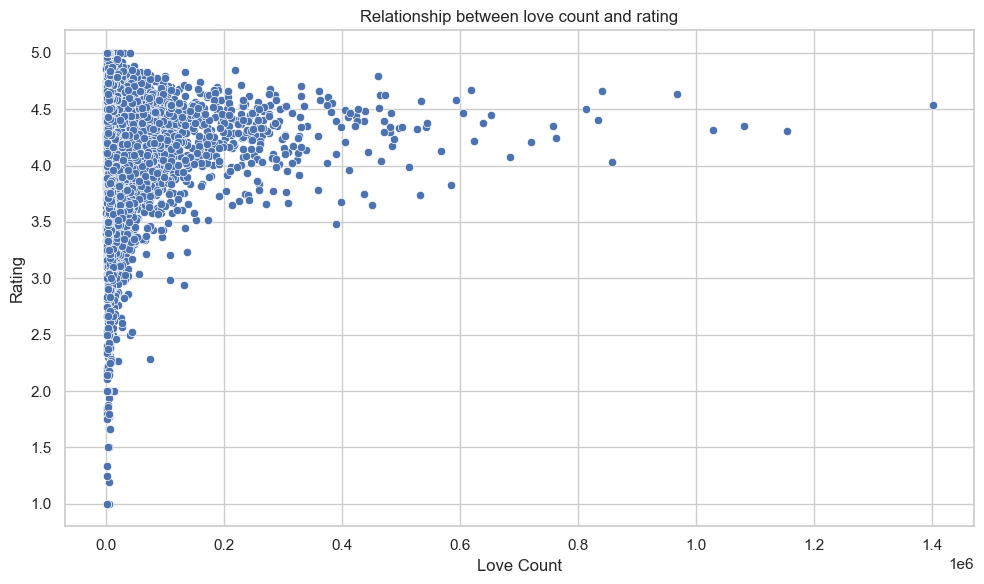

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
path = 'product_info.csv'
data = pd.read_csv(path)

# Setting style for Seaborn plots
sns.set(style='whitegrid')

# Creating a scatter plot for loves_count vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loves_count', y='rating')
plt.xlabel('Love Count')
plt.ylabel('Rating')
plt.title('Relationship between love count and rating')
plt.tight_layout()
plt.show()

### The average ratings for top 10 brands

The barplot visualises the top 10 highest average ratings. There is little variation between the top 10 brands.

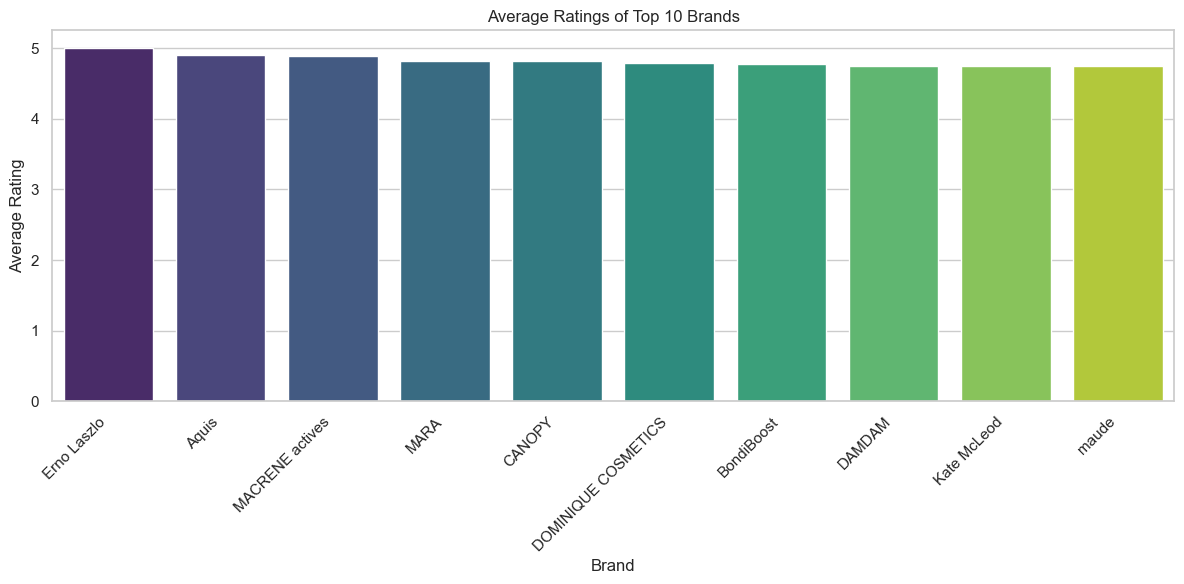

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
path = 'product_info.csv'
data = pd.read_csv(path)

# Calculating the average rating for each brand
brand_avg_rating = data.groupby('brand_name')['rating'].mean().reset_index()

# Sorting brands in descending order and selecting top 10 brands
top_10_brands = brand_avg_rating.sort_values(by='rating', ascending=False).head(10)

# Setting style for Seaborn plots
sns.set(style='whitegrid')

# Creating a bar plot for average ratings of top 10 brands
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_brands, x='brand_name', y='rating', palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 10 Brands')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

# TABLE OF CONTENT
Importing libraries 📚
Load data 💾
Pre-processing ⚒️
Data visualization 📊
Training a model 🚂

# 1. Importing libraries 📚¶

In [93]:
!pip install wordcloud

In [94]:
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import nltk
import nltk
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
sephora_dataset=pd.read_csv("product_info.csv")

# 2. Load data 💾

In [96]:
sephora_dataset

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


# 3. Pre-processing ⚒️¶

In [97]:
df = pd.read_csv('product_info.csv')

In [98]:
print(df.head())

  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...

In [99]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min   

In [100]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64


In [101]:
skincare_df = pd.read_csv('product_info.csv')

In [102]:
# Delete columns
columns_to_delete = [
    'variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition',
    'new', 'loves_count', 'variation_type', 'variation_value', 'online_only',
    'out_of_stock', 'sephora_exclusive', 'highlights', 'tertiary_category',
    'child_count', 'child_max_price', 'child_min_price'
]

skincare_df.drop(columns=columns_to_delete, inplace=True)

In [103]:
print(skincare_df.columns)

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'rating',
       'reviews', 'size', 'ingredients', 'price_usd', 'primary_category',
       'secondary_category'],
      dtype='object')


In [104]:
# Replace "n/a" with NaN (missing value indicator) in the dataframe
df.replace("n/a", pd.NA, inplace=True)

# Replace missing values in the 'reviews' and 'rating' columns with, for example, the mean of non-missing values
mean_reviews = df['reviews'].mean()
df['reviews'].fillna(mean_reviews, inplace=True)

mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)

# Data visualization 📊¶ 

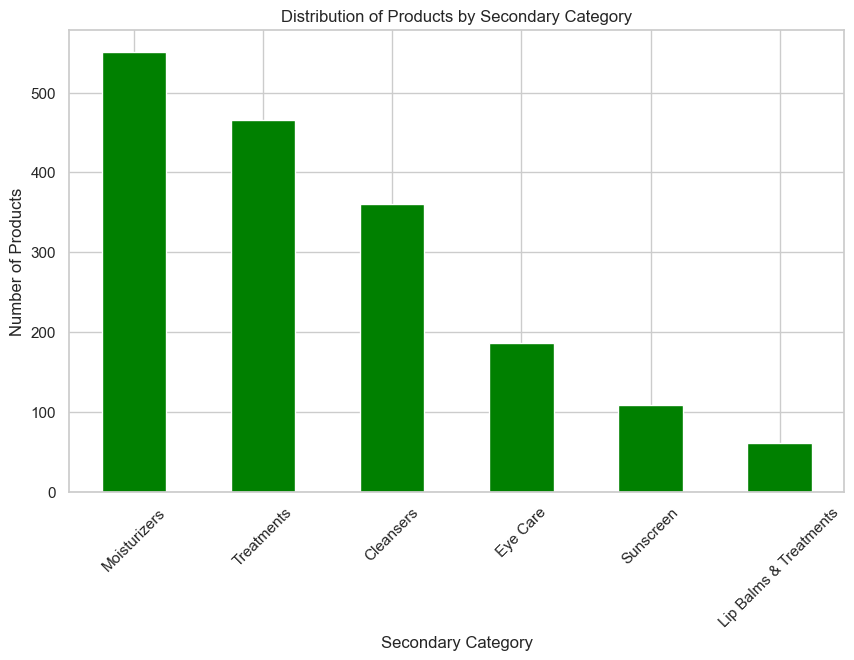

In [105]:
# Categories to include in the chart
categories_to_include = ['Treatments', 'Eye Care', 'Cleansers', 'Moisturizers', 'Lip Balms & Treatments', 'Sunscreen']

# Filter the DataFrame to include only rows with specific values in 'secondary_category'
filtered_df = df[df['secondary_category'].isin(categories_to_include)]

# Count the number of products in each category
category_counts = filtered_df['secondary_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='green')
plt.title('Distribution of Products by Secondary Category')
plt.xlabel('Secondary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


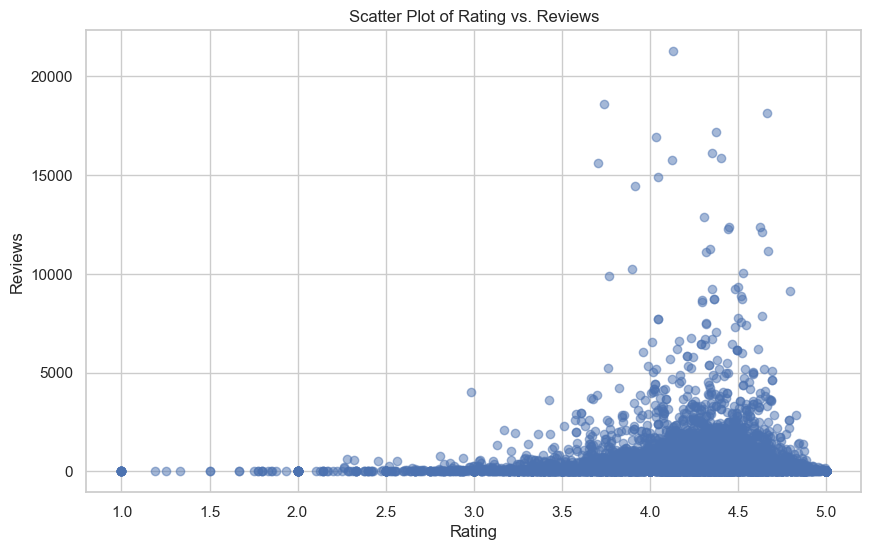

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['reviews'], alpha=0.5)
plt.title('Scatter Plot of Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.grid(True)
plt.show()


# Word Cloud for most common ingredients

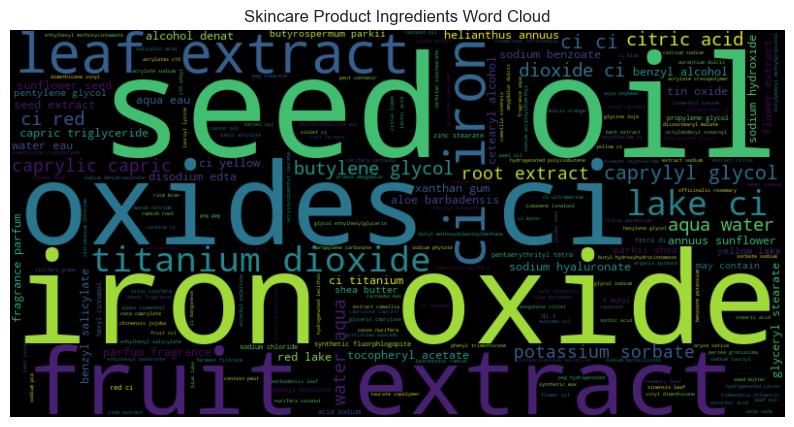

In [107]:
# Highlights the most popular ingredients in skincare products
ingredients_text = ' '.join(df['ingredients'].dropna()).lower()  
# Conversion to lowercase and combines all ingredient text

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(ingredients_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Skincare Product Ingredients Word Cloud')
plt.axis('off')  # Turn off axis labels
plt.show()

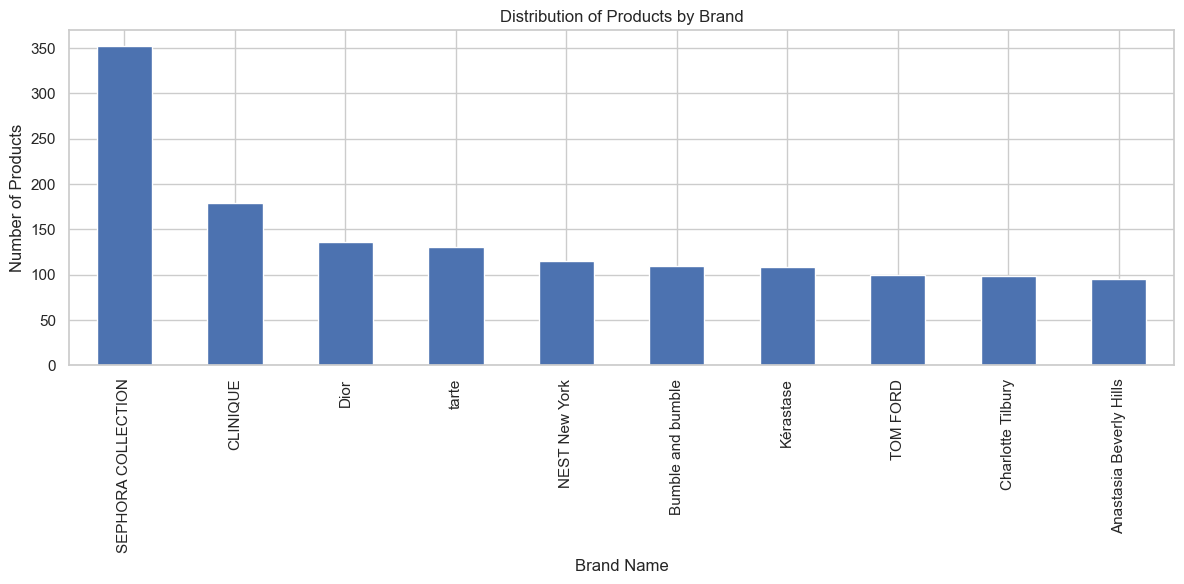

In [108]:
brand_counts = df['brand_name'].value_counts()

# Brands have been limited to the Top ten to make data more readible

brand_counts = brand_counts.head(10)

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Distribution of Products by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)  # x-axis has been rotated so labels have better readability
plt.tight_layout()  # To ensure labels fit within the figure
plt.show()